What is the most used type of card on avg?

How many players using x number of spells win on avg?

How many players using x number of towers, x number of spawners win

What rarity has the highest wr? Percentage of deck rarity in higher trophies

Need to go through each deck in data_ord and put in names/elixir cost for each id, replace maybe

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from collections import Counter

data_games = pd.read_csv(".\data_ord.csv")
data_cardlist = pd.read_csv(".\cardlist.csv")

print(data_games.head())
print(data_cards.head())

   Unnamed: 0  p1card1  p1card2  p1card3  p1card4  p1card5  p1card6  p1card7  \
0           0        8       34       37       52       69       88       92   
1           1        8       34       37       52       69       88       92   
2           2        8       34       37       52       69       88       92   
3           3        8       34       37       52       69       88       92   
4           4       25       31       59       68       77       98      101   

   p1card8  p2card1  p2card2  p2card3  p2card4  p2card5  p2card6  p2card7  \
0       97       11       12       13       58       77       86       87   
1       97       11       37       53       83       88       92       97   
2       97       19       22       25       32       54       76       87   
3       97       28       38       43       46       50       81      102   
4      105       23       34       39       73       85       94       98   

   p2card8  p1trophies  p2trophies  outcome  
0       98

In [118]:
named_deck = pd.DataFrame(data_games)

# print(named_deck)
named_deck.drop('Unnamed: 0', axis=1, inplace=True)
named_deck.head()

# barb_deck = named_deck[named_deck['p1card1'] == 8]
# barb_deck['p1card1'] = data_cards.loc[8]['cost']
# # print(barb_deck)

# for card in range(0, len(data_cards)):
#     # named_deck[named_deck['p1card1'] == card]
#     named_deck[named_deck['p1card1'] == card]['p1card1'] = data_cards.loc[card]['cost']
#     # deck

# barb_deck
# named_deck

,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,p2card2,p2card3,p2card4,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome
0,8,34,37,52,69,88,92,97,11,12,13,58,77,86,87,98,7578,7597,1
1,8,34,37,52,69,88,92,97,11,37,53,83,88,92,97,102,7548,7551,1
2,8,34,37,52,69,88,92,97,19,22,25,32,54,76,87,98,7518,7523,1
3,8,34,37,52,69,88,92,97,28,38,43,46,50,81,102,103,7485,7523,1
4,25,31,59,68,77,98,101,105,23,34,39,73,85,94,98,99,7126,7114,1


In [119]:
# Card Section

cards_winning = {}
cards_winning = defaultdict(lambda:0, cards_winning)
cards_general = {}
cards_general = defaultdict(lambda: 0, cards_general)
most_common = 0 
maximum = 0 

def get_card_occurence(cards_used, outcome): 
    global card_general
    global cards_winning
    i = 0 
    for card in cards_used:
        cards_general[card] = cards_general[card] + 1
        if outcome == 1 and i < 8:
            cards_winning[card] = cards_winning[card] + 1
        elif outcome == 2 and i >= 8: 
            cards_winning[card] = cards_winning[card] + 1
    
lst = []
data_games.apply(lambda x: get_card_occurence([x["p1card1"],x["p1card2"],x["p1card3"],x["p1card4"],x["p1card5"],x["p1card6"],x["p1card7"],x["p1card8"],x["p2card1"],x["p2card2"],x["p2card3"],x["p2card4"],x["p2card5"],x["p2card6"],x["p2card7"],x["p2card8"]],x["outcome"]), axis=1)

data_cards = pd.DataFrame.from_dict([cards_general]).transpose().reset_index()
data_cards

,index,0
0,8,45795
1,34,66651
2,37,215819
3,52,45047
4,69,62900
...,...,...
101,79,5542
102,24,53761
103,61,37426
104,100,23811


In [120]:
temp_df = data_cards
temp_df.rename(columns={0: 'occurrences', 'index': 'card'}, inplace=True)

wins_df = pd.DataFrame.from_dict([cards_winning]).transpose().reset_index()
wins_df.rename(columns={0: 'wins', 'index': 'card'}, inplace=True)
# wins_df.sort_values(by=['wins'], inplace=True, ascending=False)
wins_df

,card,wins
0,8,25130
1,34,37106
2,37,119248
3,52,24800
4,69,34967
...,...,...
101,61,20612
102,100,13478
103,67,7273
104,65,17564


In [121]:
temp_df.sort_values(by=['occurrences'], inplace=True, ascending=False)

wins_df = wins_df.merge(right=temp_df)
wins_df.sort_values(by=['wins'], inplace=True, ascending=False)

wins_df

,card,wins,occurrences
14,87,251440,452233
15,98,246900,441936
55,95,216646,389347
8,11,178754,314353
52,42,167415,299980
...,...,...,...
30,81,8423,15325
97,2,8215,14658
103,67,7273,13071
25,28,6715,12503


In [122]:
winrate_df = wins_df

for index, row in winrate_df.iterrows():    
    winrate_df.at[index, 'winrate'] = row['wins'] / row['occurrences']

winrate_df.sort_values(by=['winrate'], inplace=True, ascending=False)
winrate_df

,card,wins,occurrences,winrate
93,17,62258,104706,0.594598
76,93,19595,33035,0.593159
99,7,50096,86820,0.577010
86,64,67637,117924,0.573564
49,18,80077,140112,0.571521
...,...,...,...,...
98,79,3000,5542,0.541321
48,29,40714,75386,0.540074
53,60,17358,32185,0.539320
105,66,14993,27863,0.538097


In [123]:
change_card_df = winrate_df

print(data_cardlist.at[17, 'card'])

for index, row in change_card_df.iterrows():
    # print(row['card'])
    tup = (data_cardlist.at[row['card'], 'card'], data_cardlist.at[row['card'], 'cost'], data_cardlist.at[row['card'], 'rarity'], data_cardlist.at[row['card'], 'type'])
    # print(tup)
    change_card_df.at[index, 'card_name'] = tup[0]
    change_card_df.at[index, 'cost'] = tup[1]
    change_card_df.at[index, 'rarity'] = tup[2]
    change_card_df.at[index, 'type'] = tup[3]

change_card_df

Wizard


,card,wins,occurrences,winrate,card_name,cost,rarity,type
93,17,62258,104706,0.594598,Wizard,5.0,rare,unit
76,93,19595,33035,0.593159,Mirror,0.0,epic,spell
99,7,50096,86820,0.577010,Witch,5.0,epic,unit
86,64,67637,117924,0.573564,Firecracker,3.0,common,unit
49,18,80077,140112,0.571521,Mini P.E.K.K.A,4.0,rare,unit
...,...,...,...,...,...,...,...,...
98,79,3000,5542,0.541321,Barbarian Hut,6.0,rare,spawner
48,29,40714,75386,0.540074,Lava Hound,7.0,legendary,unit
53,60,17358,32185,0.539320,Goblin Giant,6.0,epic,unit
105,66,14993,27863,0.538097,Battle Healer,4.0,rare,unit


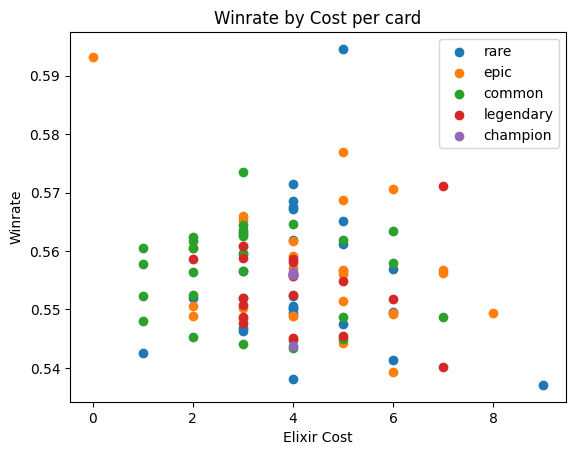

In [133]:
# make a scatter plot of winrate by elixir cost per card
for rarity in change_card_df['rarity'].unique():
    rarity_lst = change_card_df[change_card_df['rarity'] == rarity]

    plt.scatter(rarity_lst['cost'], rarity_lst['winrate'], label=rarity)

    
plt.title('Winrate by Cost per card')
plt.xlabel('Elixir Cost')
plt.ylabel('Winrate')
plt.legend(loc='upper right')
plt.show()

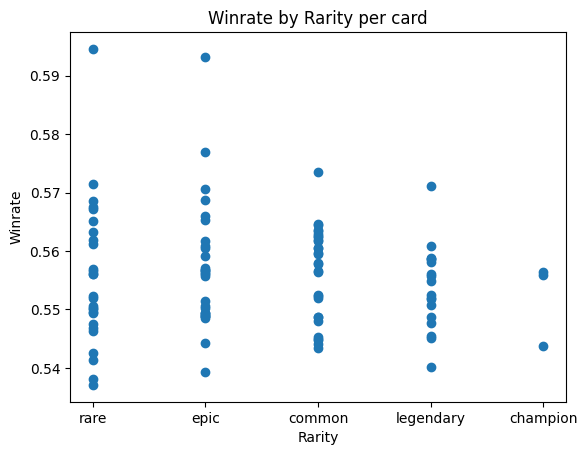

In [127]:
plt.scatter(change_card_df['rarity'], change_card_df['winrate'])
plt.title('Winrate by Rarity per card')
plt.xlabel('Rarity')
plt.ylabel('Winrate')
plt.show()